In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [24]:
df = pd.read_csv('NSE-TATAGLOBAL.csv')

In [25]:
df.head(10)

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59
6,2018-09-19,235.95,237.20,233.45,234.60,234.90,1362058,3202.78
7,2018-09-18,237.90,239.25,233.50,235.50,235.05,2614794,6163.70
8,2018-09-17,233.15,238.00,230.25,236.40,236.60,3170894,7445.41
9,2018-09-14,223.45,236.70,223.30,234.00,233.95,6377909,14784.50


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [27]:
df.columns = df.columns.str.lower()

In [28]:
df.columns = df.columns.str.replace(' ', '_')

In [29]:
df.head()

,date,open,high,low,last,close,total_trade_quantity,turnover_(lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   date                  2035 non-null   object 
 1   open                  2035 non-null   float64
 2   high                  2035 non-null   float64
 3   low                   2035 non-null   float64
 4   last                  2035 non-null   float64
 5   close                 2035 non-null   float64
 6   total_trade_quantity  2035 non-null   int64  
 7   turnover_(lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [9]:
df['date'] = pd.to_datetime(df['date'])

In [10]:
X = df[['open','high','low']]
y = df['close']

In [11]:
X.head()

,open,high,low
0,234.05,235.95,230.20
1,234.55,236.80,231.10
2,240.00,240.00,232.50
3,233.30,236.75,232.00
4,233.55,239.20,230.75


In [12]:
y.head()

0    233.75
1    233.25
2    234.25
3    236.10
4    233.30
Name: close, dtype: float64

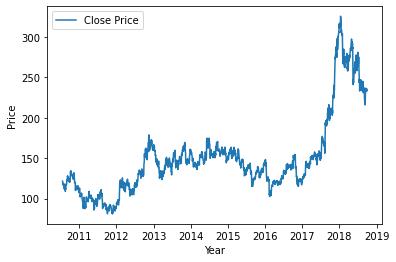

In [13]:
plt.plot(df['date'],y)
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['Close Price'])

In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(X)
features = pd.DataFrame(data=features,index=df.index,columns=X.columns)
features.head()

,open,high,low
0,0.620235,0.622688,0.621560
1,0.622263,0.626144,0.625285
2,0.644363,0.639154,0.631078
3,0.617194,0.625940,0.629009
4,0.618208,0.635902,0.623836


In [15]:
from sklearn.model_selection import TimeSeriesSplit
timesplit= TimeSeriesSplit(n_splits=10)
for train_index, test_index in timesplit.split(features):
        X_train, X_test = features[:len(train_index)], features[len(train_index): (len(train_index)+len(test_index))]
        y_train, y_test = y[:len(train_index)].values.ravel(), y[len(train_index): (len(train_index)+len(test_index))].values.ravel()

In [16]:
trainX = np.array(X_train)
testX = np.array(X_test)

X_train = trainX.reshape(trainX.shape[0], 1, trainX.shape[1])
X_test = testX.reshape(testX.shape[0], 1, testX.shape[1])

In [17]:
import tensorflow as tf

In [18]:

import keras
from keras.layers import LSTM
from keras.layers import Dense

In [19]:
lstm = tf.keras.models.Sequential()

lstm.add(LSTM(32, input_shape=(1, trainX.shape[1]), activation='relu', return_sequences=False))
lstm.add(Dense(1))
lstm.compile(loss='mean_squared_error', optimizer='adam')

In [20]:
history=lstm.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1, shuffle=False)

Epoch 1/100
232/232 [==============================] - 2s 3ms/step - loss: 25828.3398
Epoch 2/100
232/232 [==============================] - 1s 4ms/step - loss: 25241.7773
Epoch 3/100
232/232 [==============================] - 0s 2ms/step - loss: 23251.6680
Epoch 4/100
232/232 [==============================] - 1s 3ms/step - loss: 19925.2656
Epoch 5/100
232/232 [==============================] - 1s 4ms/step - loss: 15906.0947
Epoch 6/100
232/232 [==============================] - 0s 2ms/step - loss: 11861.4346
Epoch 7/100
232/232 [==============================] - 1s 3ms/step - loss: 8242.4395
Epoch 8/100
232/232 [==============================] - 1s 3ms/step - loss: 5300.6309
Epoch 9/100
232/232 [==============================] - 0s 2ms/step - loss: 3125.0613
Epoch 10/100
232/232 [==============================] - 0s 2ms/step - loss: 1673.7095
Epoch 11/100
232/232 [==============================] - 0s 1ms/step - loss: 812.0404
Epoch 12/100
232/232 [==============================] - 0s

In [21]:
y_pred= lstm.predict(X_test)

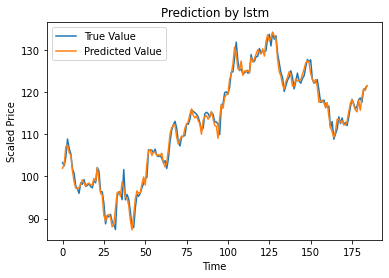

In [22]:
plt.plot(y_test, label='True Value')
plt.plot(y_pred, label='Predicted Value')
plt.title('Prediction by lstm')
plt.xlabel('Time')
plt.ylabel('Scaled Price')
plt.legend()
plt.show()-